In [23]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
%matplotlib inline 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn import datasets

In [24]:
def GradientDescent(Amat, y, winit, rate, num_iter, regularization_param = 0):
    n, p = Amat.shape
    w_history = []
    loss_history = []
    w = winit
    
    for i in range(num_iter):
        loss = np.square(y - Amat.dot(w)).mean()
        w_history.append(w)
        loss_history.append(loss)
        grad = (-2/n)*Amat.T.dot(y - Amat.dot(w)) + regularization_param * w
        w = w - rate * grad
        
    return w, np.asarray(w_history), np.asarray(loss_history)

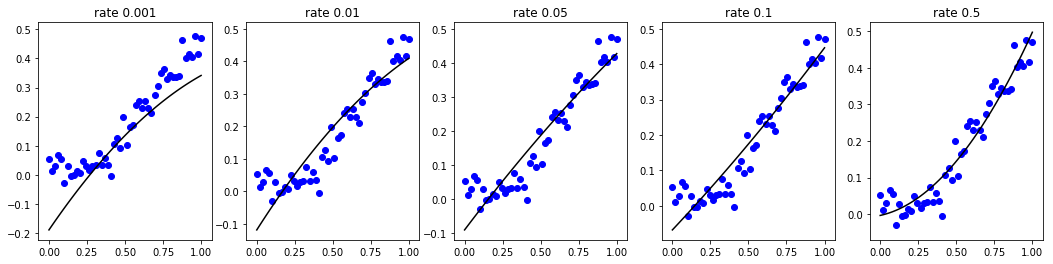

In [25]:
# create small training data set ##########################
def f(x):
    return 0.5*(x)*(x**4)/(.05+(x**4))

ntrain=50

np.random.seed(0)
X=np.linspace(0,1,ntrain)
Xsq=np.square(X)

Xsq

y0=f(X)+0.03*np.random.normal(0,1,ntrain)

y0

Aquad=np.stack((np.ones(ntrain),X,Xsq)).T

ntest = 50

Xtest=np.linspace(0,1,ntest)

n, p = Aquad.shape

w0 = np.random.randn(p)

weights = []

rates = [.001,.01,.05,.1,.5]

for i, r in enumerate(rates):
    weights.append(GradientDescent(Aquad, y0,  w0, r, 1000)[0])
    
fig, ax = plt.subplots(figsize=(18,4),nrows=1, ncols=5,sharex='col')
for d in range(5):
    ax[d].scatter(X,y0, c='b')
    ax[d].plot(X, weights[d][0] + weights[d][1]*X + weights[d][2]*X**2, c='k')
    title = 'rate '+str(rates[d])
    ax[d].set_title(title)


In [26]:
X

array([ 0.        ,  0.02040816,  0.04081633,  0.06122449,  0.08163265,
        0.10204082,  0.12244898,  0.14285714,  0.16326531,  0.18367347,
        0.20408163,  0.2244898 ,  0.24489796,  0.26530612,  0.28571429,
        0.30612245,  0.32653061,  0.34693878,  0.36734694,  0.3877551 ,
        0.40816327,  0.42857143,  0.44897959,  0.46938776,  0.48979592,
        0.51020408,  0.53061224,  0.55102041,  0.57142857,  0.59183673,
        0.6122449 ,  0.63265306,  0.65306122,  0.67346939,  0.69387755,
        0.71428571,  0.73469388,  0.75510204,  0.7755102 ,  0.79591837,
        0.81632653,  0.83673469,  0.85714286,  0.87755102,  0.89795918,
        0.91836735,  0.93877551,  0.95918367,  0.97959184,  1.        ])

[array([ 0.00344654,  0.05214439,  0.44687108])]


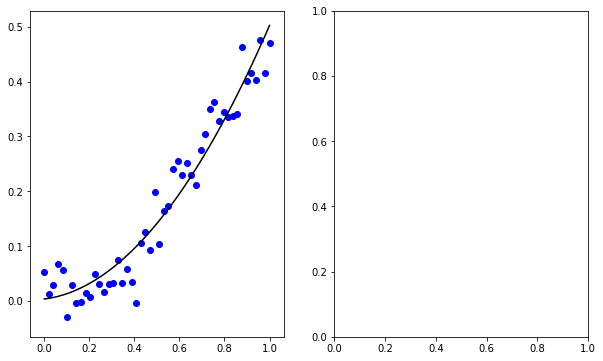

In [27]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0, solver="cholesky", fit_intercept=False)
ridge_reg.fit(Aquad, y0)

weights = [ridge_reg.coef_]

print(weights)


fig, ax = plt.subplots(figsize=(10,6),nrows=1, ncols=2,sharex='col')

d = 0
ax[0].scatter(X,y0, c='b')
ax[0].plot(X, weights[d][0] + weights[d][1]*X + weights[d][2]*X**2, c='k')
title = 'rate '+str(rates[d])


Try to fit a higher degree model with alpha = 0

### Coursework

### Generating the data

In [28]:
np.random.normal(0, 0.2, size=100).shape

(100,)

(100,)


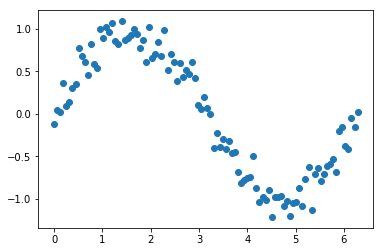

In [29]:
def f(x):
    return np.sin(x)

min_x = 0
num_points = 100
max_x = 2*np.pi

X = np.linspace(min_x, max_x, num_points)

print (X.shape)

y = f(X) + np.random.normal(0, 0.15, size=num_points)

plt.scatter(X, y)

### Fitting a model of degree = 2

Creating Design matrix

In [30]:
Xsq = np.square(X)
A = np.stack((np.ones(num_points), X, Xsq)).T


Minimizing loss by Gradient descent

(3,)
[array([ 0.1183023 , -0.00998546, -0.02329328]), array([ 0.14312872,  0.02056368, -0.03040467]), array([ 0.17454697,  0.05768358, -0.03909844]), array([ 0.21149756,  0.09232301, -0.04753308]), array([ 0.21500129,  0.09204328, -0.0476253 ])]


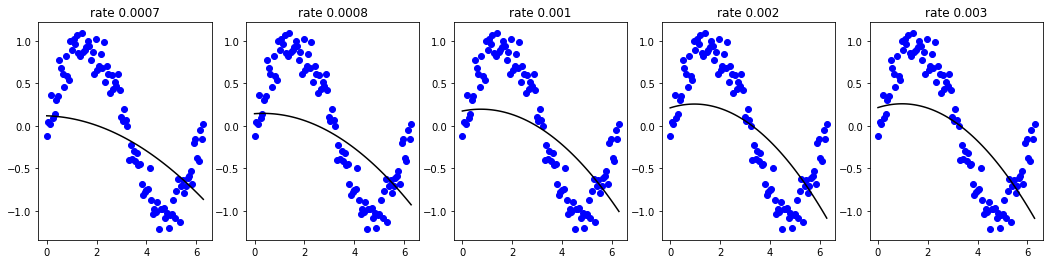

In [33]:
n, p = A.shape

w0 = np.random.randn(p)

print(w0.shape)



weights = []

rates = [.0007, .0008, .001, .002, .003]

for i, r in enumerate(rates):
    weights.append(GradientDescent(A, y,  w0, r, 1000, 1)[0])
    
    
print (weights)
fig, ax = plt.subplots(figsize=(18,4),nrows=1, ncols=5,sharex='col')
for d in range(5):
    ax[d].scatter(X,y, c='b')
    ax[d].plot(X, weights[d][0] + weights[d][1]*X + weights[d][2]*X**2, c='k')
    title = 'rate '+str(rates[d])
    ax[d].set_title(title)

    

#### Results

- Above were results of Ridge Regression with GradientDescent

- It can be seen that when lambda = 0; there is no difference from normal gradient descent

- If lambda increases a lot (lambda = 1000) there is underfitting, all the weights are very less and the line looks like a st line

### RIdge Regression in closed form (deg = 2)

[array([ 0.472433  , -0.00981168, -0.03828578])]


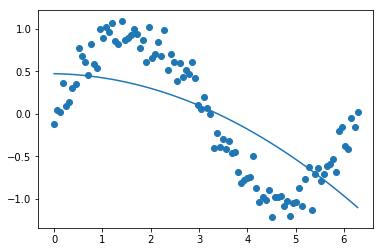

In [34]:
ridge_reg = Ridge(alpha=10, solver="cholesky", fit_intercept=False)
ridge_reg.fit(A, y)

weights = [ridge_reg.coef_]

print(weights)


plt.scatter(X, y)

plt.plot(X, weights[0][0] + weights[0][1]*X + weights[0][2]*X**2)

### RIdge Regression in closed form (deg = 3)

In [40]:
X = X.reshape(num_points, 1)

[array([ 0.4050188 ,  0.57908608, -0.35818853,  0.03919433])]


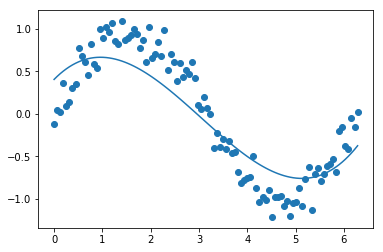

In [83]:
from sklearn.preprocessing import PolynomialFeatures



features = PolynomialFeatures(degree = 3, include_bias = True)

X_feature = features.fit_transform(X)

# X_feature is the design matrix

regress = Ridge(alpha = 10, solver="cholesky", fit_intercept=False)

regress.fit(X_feature, y)


weights = [regress.coef_]
print(weights)

y_predicted = regress.predict(X_feature)

plt.scatter(X, y)

plt.plot(X, y_predicted)





#### Cross Verification: with eqn given

w = (XTX + λIp+1)-1XTy;

In [84]:
XTX = X_feature.T.dot(X_feature)

I = np.identity(4)
alpha = 10

alpha_I = alpha * I

lhs = XTX + alpha_I

lhs = np.linalg.inv(lhs)

lhs.dot(X_feature.T.dot(y.reshape(100, 1)))

array([[ 0.4050188 ],
       [ 0.57908608],
       [-0.35818853],
       [ 0.03919433]])

Solving for the eqn in closed  form for degree == 3 and lambda = 10, we get weights as:

[array([ 0.4050188 ,  0.57908608, -0.35818853,  0.03919433])]


We verify this with the eqn of w

And **we get the same wts**!!

Also include derivation from copy
